# Exercises for Section 3.3 Introduction to hypothesis testing

This notebook contains the solutions to the exercises
from [Section 3.3 Introduction to hypothesis testing]()
in the **No Bullshit Guide to Statistics**.

### Notebooks setup

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pandas setup
pd.set_option("display.precision", 2)

In [4]:
# Plot helper functions
from plot_helpers import savefigure

In [5]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

<Figure size 640x480 with 0 Axes>

### Estimator functions defined in Section 3.1

In [6]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

## Exercises

### Mean test on batch 05 (estimated variance)

In [11]:
ksample05 = kombucha[kombucha["batch"]==5]["volume"]
bootstrap_test_mean(ksample05, mu0=1000)[1]

0.0148

Correctly rejects this as an irregular batch.

count      40.000000
mean     1002.534750
std         6.553409
min       992.090000
25%       998.515000
50%      1002.060000
75%      1004.870000
max      1027.190000
Name: volume, dtype: float64

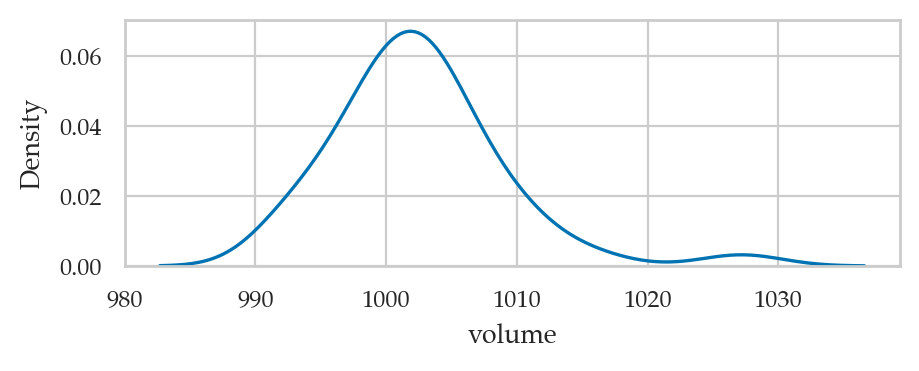

In [12]:
sns.kdeplot(ksample05)
ksample05.describe()

### Sleep scores

In [ ]:
doctors = pd.read_csv("../datasets/doctors.csv")
scoresU = doctors[doctors["location"]=="urban"]["score"]
scoresR = doctors[doctors["location"]=="rural"]["score"]

# observed difference between means
dhat = dmeans(scoresR, scoresU)
dhat

2.2236048265460084

In [ ]:
pstats, pvalue = permutation_test(scoresR, scoresU, estfunc=dmeans)
pvalue

0.0132

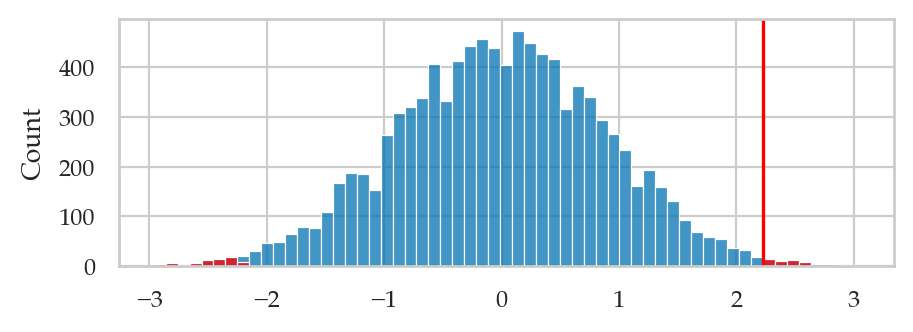

In [ ]:
# plot the sampling distribution in blue
bins = nicebins(dstats, dhat)
sns.histplot(pstats, bins=bins)

# plot red line for the observed statistic
plt.axvline(dhat, color="red")

# plot the values that are equal or more extreme in red
tails = tailvalues(pstats, dhat)
_ = sns.histplot(tails, bins=bins, color="red")

In [ ]:
# ALT. use the ttest_ind with permutations argument
from scipy.stats import ttest_ind
ttest_ind(scoresR, scoresU, permutations=10000).pvalue

0.013098690130986902

### Cohen's d via bootstrap